<a href="https://colab.research.google.com/github/therahulmehta/MNIST_classification/blob/master/multiout_MINST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import cross_val_predict

mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [11]:
# view the keys for 70,000 images with 784 features
# 28 x 28 px
# pixel intensity from 0 to 255
X, y = mnist["data"], mnist["target"]
X.shape
y.shape

(70000,)

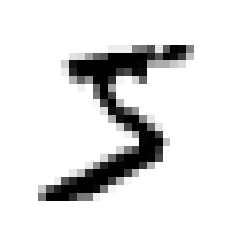

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap ="binary")
plt.axis("off")
plt.show()

In [13]:
import numpy as np
# cast data to int
y = y.astype(np.uint8)

# split train and test (data already shuffled)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [14]:
noise = np.random.randint(0,100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0,100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [19]:
# training multilabel split data
from sklearn.neighbors import KNeighborsClassifier 
knn_clf = KNeighborsClassifier()

In [31]:
import matplotlib
import matplotlib.pyplot as plt

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")

1994


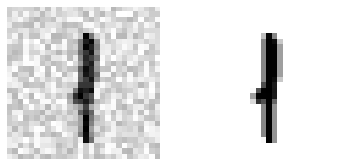

In [40]:
from random import randrange
random_index = randrange(3500)
print(random_index)
plt.subplot(121); plot_digit(X_test_mod[random_index])
plt.subplot(122); plot_digit(y_test_mod[random_index])
plt.show()

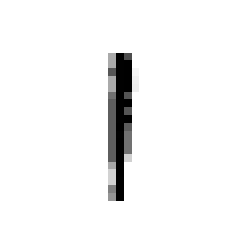

In [41]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[random_index]])
plot_digit(clean_digit)